# Citation Data Preprocessing and Network Analysis

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
citations_df = pd.read_csv('INPUT_SQL_Citation_Data_Astronomy_and_Astrophysics.csv')
citations_df

,concept_year,cited_concept_id,cited_work_id,cited_publication_year,cited_ror_paper,citing_paper
0,https://openalex.org/C1276947_2008,https://openalex.org/C1276947,https://openalex.org/W2088198344,2008,https://ror.org/03vek6s52+first@https://ror.or...,https://openalex.org/W1943043803^^https://ror....
1,https://openalex.org/C1276947_2008,https://openalex.org/C1276947,https://openalex.org/W2109467954,2008,https://ror.org/05f82e368+first@https://ror.or...,https://openalex.org/W2029560487^^https://ror....
2,https://openalex.org/C1276947_2012,https://openalex.org/C1276947,https://openalex.org/W1882938068,2012,https://ror.org/013meh722+first@https://ror.or...,https://openalex.org/W3175067683^^https://ror....
3,https://openalex.org/C44870925_2009,https://openalex.org/C44870925,https://openalex.org/W1988229964,2009,https://ror.org/03s65by71+last@https://ror.org...,https://openalex.org/W2150316758^^https://ror....
4,https://openalex.org/C44870925_2012,https://openalex.org/C44870925,https://openalex.org/W2060250939,2012,https://ror.org/01dr6c206+middle@https://ror.o...,https://openalex.org/W2079448371^^https://ror....
...,...,...,...,...,...,...
46096,https://openalex.org/C44870925_2009,https://openalex.org/C44870925,https://openalex.org/W2021760326,2009,https://ror.org/05hppb561+last@https://ror.org...,NaN
46097,https://openalex.org/C44870925_2005,https://openalex.org/C44870925,https://openalex.org/W2042064395,2005,https://ror.org/047426m28+last@https://ror.org...,https://openalex.org/W2064901440^^https://ror....
46098,https://openalex.org/C1276947_2009,https://openalex.org/C1276947,https://openalex.org/W3123739990,2009,https://ror.org/035b05819+middle@https://ror.o...,https://openalex.org/W3123032366^^https://ror....
46099,https://openalex.org/C1276947_1999,https://openalex.org/C1276947,https://openalex.org/W3098803276,1999,https://ror.org/04jr01610+last@https://ror.org...,NaN


In [3]:
full_citation_with_ROR_df = pd.read_csv("edge_list_ROR_to_ROR.csv")

In [4]:
full_citation_with_ROR_df.head()

,Unnamed: 0,Year,Citations,N_Citations_Received_Timeframe,Country_Sender,ROR_Sender_Name,Country_Receiver,ROR_Receiver_Name
0,0,1990,0.083333,2,Netherlands,Netherlands Institute for Radio Astronomy,United States,Johns Hopkins University
1,1,1990,0.083333,2,Australia,Mount Stromlo Observatory,United States,Johns Hopkins University
2,2,1990,0.125000,2,United States,University of Massachusetts Amherst,United States,Johns Hopkins University
3,3,1990,0.038462,2,United States,The University of Texas at Austin,United States,Johns Hopkins University
4,4,1990,0.250000,2,Italy,University of Milan,United States,Johns Hopkins University


In [14]:
# Create a directed graph
Graph = nx.DiGraph()

for index, row in full_citation_with_ROR_df.iterrows():
    sender = row['Country_Sender']
    receiver = row['Country_Receiver']
    weight = row['Citations']
    
    Graph.add_edge(sender, receiver, weight=weight)

print("Number of nodes:", Graph.number_of_nodes())
print("Number of edges:", Graph.number_of_edges())

Number of nodes: 102
Number of edges: 3947


In [24]:
# Check if the Graph is Directed
is_directed = nx.is_directed(Graph)
is_directed

True

In [25]:
# Check for Self-loops
num_selfloops = nx.number_of_selfloops(Graph)
num_selfloops

69

## Centrality Measures

In [26]:
# Degree Centrality
degree_centrality = nx.degree_centrality(Graph)
degree_centrality

{'Netherlands': 1.5346534653465347,
 'United States': 1.8613861386138615,
 'Australia': 1.5742574257425743,
 'Italy': 1.603960396039604,
 'Japan': 1.5346534653465347,
 'United Kingdom': 1.6534653465346534,
 'Germany': 1.7227722772277227,
 'Canada': 1.5445544554455446,
 'Spain': 1.5445544554455446,
 'Switzerland': 1.3861386138613863,
 'Chile': 1.2376237623762376,
 'France': 1.5940594059405941,
 'Israel': 1.3366336633663367,
 'Russia': 1.4257425742574257,
 'Serbia': 1.316831683168317,
 'Puerto Rico': 0.8316831683168316,
 'Austria': 1.2178217821782178,
 'Poland': 1.316831683168317,
 'China': 1.5247524752475248,
 'Mexico': 1.306930693069307,
 'Turkey': 1.0495049504950495,
 'Brazil': 1.2871287128712872,
 'India': 1.4356435643564356,
 'Greece': 1.1782178217821782,
 'South Korea': 1.316831683168317,
 'Belgium': 1.3762376237623763,
 'Norway': 1.0891089108910892,
 'Hungary': 1.2079207920792079,
 'Sweden': 1.3267326732673268,
 'Ukraine': 0.9108910891089109,
 'Denmark': 1.316831683168317,
 'Taiwa

In [27]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(Graph)
closeness_centrality

{'Netherlands': 0.8154588568100508,
 'United States': 0.9607881580237231,
 'Australia': 0.8664250353606788,
 'Italy': 0.8293983244478293,
 'Japan': 0.822369525088102,
 'United Kingdom': 0.8664250353606788,
 'Germany': 0.8985148514851484,
 'Canada': 0.8154588568100508,
 'Spain': 0.8293983244478293,
 'Switzerland': 0.758121905940594,
 'Chile': 0.7296210824089928,
 'France': 0.8365483100034141,
 'Israel': 0.7640913697668978,
 'Russia': 0.7825774512935164,
 'Serbia': 0.7763168316831683,
 'Puerto Rico': 0.6646548216465482,
 'Austria': 0.7031855359448987,
 'Poland': 0.7351485148514851,
 'China': 0.801980198019802,
 'Mexico': 0.7522449919410545,
 'Turkey': 0.6512725098013157,
 'Brazil': 0.7464584920030464,
 'India': 0.7825774512935164,
 'Greece': 0.7031855359448987,
 'South Korea': 0.7640913697668978,
 'Belgium': 0.7640913697668978,
 'Norway': 0.6785986290936785,
 'Hungary': 0.7135264997087943,
 'Sweden': 0.7351485148514851,
 'Ukraine': 0.618086649429274,
 'Denmark': 0.7522449919410545,
 'Tai

In [28]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(Graph)
betweenness_centrality

{'Netherlands': 0.021698460215220188,
 'United States': 0.10183314861458953,
 'Australia': 0.024373801455527092,
 'Italy': 0.02576101743120442,
 'Japan': 0.023132884605503945,
 'United Kingdom': 0.024869885956780493,
 'Germany': 0.04148639592710523,
 'Canada': 0.019181439573848335,
 'Spain': 0.01478463173538766,
 'Switzerland': 0.011603657731344566,
 'Chile': 0.005544144001494631,
 'France': 0.02275304010759856,
 'Israel': 0.0069103184469857725,
 'Russia': 0.010351011775673533,
 'Serbia': 0.01534379516266699,
 'Puerto Rico': 0.00029386206024478067,
 'Austria': 0.003742468344364923,
 'Poland': 0.008516881765080971,
 'China': 0.024742178144779074,
 'Mexico': 0.005487358141511481,
 'Turkey': 0.0022307698051355503,
 'Brazil': 0.00873219930396937,
 'India': 0.016250209621859732,
 'Greece': 0.003304266526129253,
 'South Korea': 0.0063075799322252855,
 'Belgium': 0.010239566949940921,
 'Norway': 0.0022283456049677626,
 'Hungary': 0.005109647510784157,
 'Sweden': 0.008134633711990094,
 'Ukrain

In [29]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(Graph, max_iter=1000)
eigenvector_centrality

{'Netherlands': 0.14776075202848263,
 'United States': 0.15468764393973522,
 'Australia': 0.15196945668948172,
 'Italy': 0.15175435789035696,
 'Japan': 0.1505093824472166,
 'United Kingdom': 0.15195446245653008,
 'Germany': 0.15352812861809695,
 'Canada': 0.14632839425876498,
 'Spain': 0.14903725443405172,
 'Switzerland': 0.14177926787732534,
 'Chile': 0.14107707573009756,
 'France': 0.15047358967856367,
 'Israel': 0.14340483858073946,
 'Russia': 0.14668030388120604,
 'Serbia': 0.1449016880255043,
 'Puerto Rico': 0.1209560675792259,
 'Austria': 0.12923869352739364,
 'Poland': 0.14153154613254396,
 'China': 0.14744529989008542,
 'Mexico': 0.14348947683646215,
 'Turkey': 0.11920258657383494,
 'Brazil': 0.14063851481257064,
 'India': 0.14470405569460898,
 'Greece': 0.13383262813828953,
 'South Korea': 0.1447955115469545,
 'Belgium': 0.1412124875126833,
 'Norway': 0.12801709213250356,
 'Hungary': 0.13235455350715966,
 'Sweden': 0.13928315085801302,
 'Ukraine': 0.10430010611784692,
 'Denmar

In [22]:
# PageRank
pagerank = nx.pagerank(Graph)
pagerank

{'Netherlands': 0.01278277404147505,
 'United States': 0.032443064563665136,
 'Australia': 0.019227212879980648,
 'Italy': 0.018498564554232537,
 'Japan': 0.018178528481666918,
 'United Kingdom': 0.016181879056309145,
 'Germany': 0.017254515610465926,
 'Canada': 0.024316525409124306,
 'Spain': 0.00864163234882645,
 'Switzerland': 0.010584694379331804,
 'Chile': 0.01299264680762733,
 'France': 0.013958005183700136,
 'Israel': 0.015099075734222252,
 'Russia': 0.013810583964076714,
 'Serbia': 0.021333440295734925,
 'Puerto Rico': 0.015541759780029602,
 'Austria': 0.011131450464895824,
 'Poland': 0.010985041072698574,
 'China': 0.019893666335117327,
 'Mexico': 0.013981970128186435,
 'Turkey': 0.005357177914663305,
 'Brazil': 0.008521379608220563,
 'India': 0.018814727273213042,
 'Greece': 0.01721360578064981,
 'South Korea': 0.008553452334651752,
 'Belgium': 0.012297995230454935,
 'Norway': 0.012495491358618861,
 'Hungary': 0.006401431058613169,
 'Sweden': 0.013069021767057893,
 'Ukraine':

## Community Detection

In [64]:
from community import best_partition
partition = best_partition(Graph)
partition

ImportError: cannot import name 'best_partition' from 'community' (/home/u22/harsh24/.local/lib/python3.8/site-packages/community/__init__.py)

## Clustering

In [35]:
# Clustering Coefficient
clustering_coefficient = nx.clustering(Graph)
clustering_coefficient

{'Netherlands': 0.5787766049489531,
 'United States': 0.42300502395139616,
 'Australia': 0.5569563074901446,
 'Italy': 0.5517554958089514,
 'Japan': 0.5811488883121377,
 'United Kingdom': 0.5241174284652546,
 'Germany': 0.4904280049227403,
 'Canada': 0.566288202151272,
 'Spain': 0.582486551105798,
 'Switzerland': 0.6603492333901193,
 'Chile': 0.7534577682288169,
 'France': 0.5514370346649587,
 'Israel': 0.697729097373552,
 'Russia': 0.645722328340203,
 'Serbia': 0.6990779051897388,
 'Puerto Rico': 0.9116038882138517,
 'Austria': 0.7637675128311833,
 'Poland': 0.7042336802270577,
 'China': 0.5886014905743095,
 'Mexico': 0.7191065209559265,
 'Turkey': 0.8550178874035022,
 'Brazil': 0.7125154894671624,
 'India': 0.6333630686886709,
 'Greece': 0.7925760950259837,
 'South Korea': 0.7127231878916873,
 'Belgium': 0.663947709593777,
 'Norway': 0.8465968586387435,
 'Hungary': 0.751163774862463,
 'Sweden': 0.6964368886818817,
 'Ukraine': 0.9220206601158982,
 'Denmark': 0.703677426983564,
 'Taiwa

In [36]:
# Average Clustering
avg_clustering = nx.average_clustering(Graph)
avg_clustering

0.8614093103227413

## Connectivity

In [37]:
components = nx.weakly_connected_components(Graph)
components

<generator object weakly_connected_components at 0x7f41417e9510>

In [38]:
strong_components = nx.strongly_connected_components(Graph)
strong_components

<generator object strongly_connected_components at 0x7f41417e94a0>

In [85]:
#weakly connected components
weakly_connected = list(nx.weakly_connected_components(Graph))

In [86]:
#Number of weakly connected components
num_weakly_connected = len(weakly_connected)
num_weakly_connected

1

In [87]:
#Largest weakly connected component
largest_weakly_connected = max(weakly_connected, key=len)
largest_weakly_connected

{'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'French Polynesia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Malta',
 'Mexico',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'North Macedonia',
 'Norway',
 'Oman',
 'Pakistan',
 'Palestine',
 'Peru',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Sout

In [88]:
#Size of the largest weakly connected component
size_largest_weakly = len(largest_weakly_connected)
size_largest_weakly

102

In [89]:
#strongly connected components
strongly_connected = list(nx.strongly_connected_components(Graph))
strongly_connected

[{'Luxembourg'},
 {'French Polynesia'},
 {'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Bahrain',
  'Belarus',
  'Belgium',
  'Benin',
  'Bolivia',
  'Brazil',
  'Bulgaria',
  'Cambodia',
  'Canada',
  'Chile',
  'China',
  'Colombia',
  'Costa Rica',
  'Croatia',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Egypt',
  'Estonia',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Ghana',
  'Greece',
  'Hong Kong',
  'Hungary',
  'Iceland',
  'India',
  'Indonesia',
  'Iran',
  'Ireland',
  'Israel',
  'Italy',
  'Jamaica',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Latvia',
  'Lebanon',
  'Lithuania',
  'Malaysia',
  'Malta',
  'Mexico',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Nepal',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Nigeria',
  'Norway',
  'Pakistan',
  'Peru',
  'Poland',
  'Portugal',
  'Puerto Rico',
  'Qatar',
  'Romania',
  'Russia',
  'Saudi Arabia',
  'Serbia',
  'Singapore',
  'Slovakia',
  'Slovenia',
  'South Africa',
  'South Kore

In [90]:
#Number of strongly connected components
num_strongly_connected = len(strongly_connected)
num_strongly_connected

11

In [91]:
#Largest strongly connected component
largest_strongly_connected = max(strongly_connected, key=len)
largest_strongly_connected

{'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bahrain',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Malaysia',
 'Malta',
 'Mexico',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Peru',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Svalbard and Jan Mayen',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Tanzania',
 'Thailand',
 'Tunisi

In [92]:
#Size of the largest strongly connected component
size_largest_strongly = len(largest_strongly_connected)
size_largest_strongly

92

## Path Analysis

In [39]:
# Average Shortest Path Length
# N.B., computationally VERY intensive
avg_path_length = nx.average_shortest_path_length(Graph)
avg_path_length

NetworkXError: Graph is not strongly connected.

In [40]:
# Diameter of the Graph
# N.B., computationally VERY intensive
graph_diameter = nx.diameter(Graph)
graph_diameter

NetworkXError: Found infinite path length because the digraph is not strongly connected

## Visualization

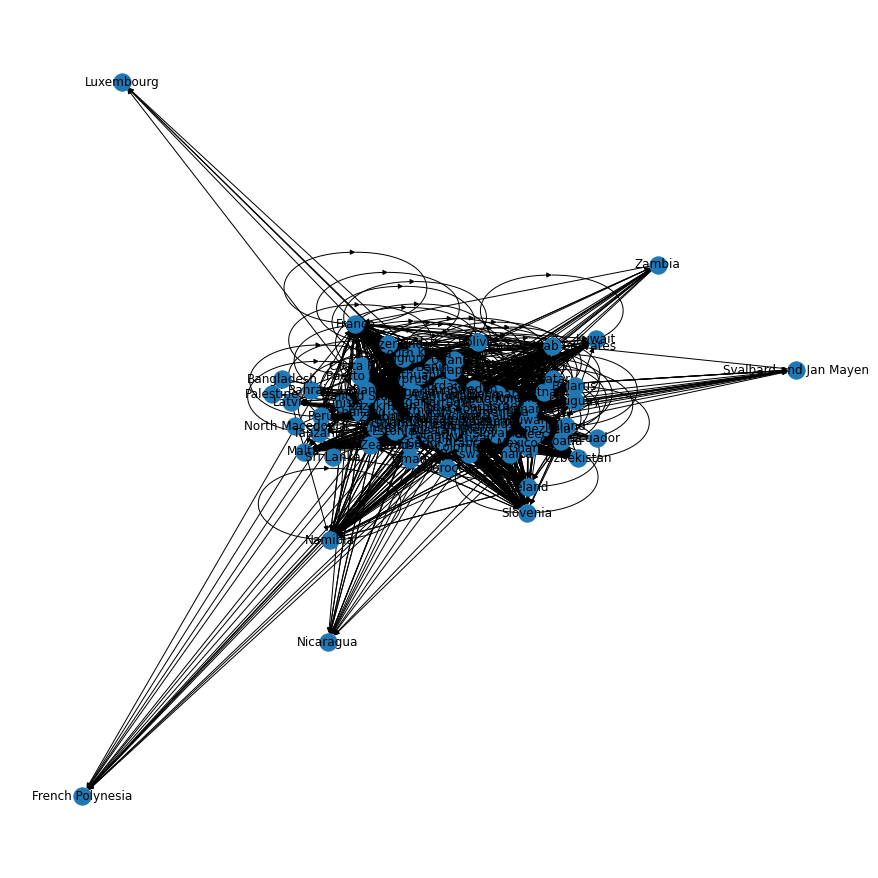

In [41]:
plt.figure(figsize=(12, 12))
nx.draw(Graph, with_labels=True)
plt.show()

In [1]:
import plotly.graph_objects as go
# Generate position data for nodes
pos = nx.spring_layout(Graph)

# Create edges
edge_x = []
edge_y = []
for edge in Graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')


#create node
node_x = []
node_y = []
text = []
for node in Graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        size=10,
        color='blue', 
        line_width=2,
        showscale=False  
    )
)

node_trace.marker.size = [5 * nx.degree_centrality(Graph)[v] for v in Graph]


node_trace.text = text
node_trace.textposition = "top center"

viz = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Interactive Graph Visualization",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

viz.show()


NameError: name 'nx' is not defined

## Degree Distribution

In [42]:
degrees = [Graph.degree(n) for n in Graph.nodes()]
degrees

[155,
 188,
 159,
 162,
 155,
 167,
 174,
 156,
 156,
 140,
 125,
 161,
 135,
 144,
 133,
 84,
 123,
 133,
 154,
 132,
 106,
 130,
 145,
 119,
 133,
 139,
 110,
 122,
 134,
 92,
 133,
 115,
 126,
 76,
 76,
 101,
 98,
 81,
 130,
 102,
 117,
 118,
 126,
 85,
 83,
 86,
 108,
 35,
 38,
 50,
 39,
 104,
 90,
 68,
 68,
 121,
 33,
 33,
 47,
 88,
 11,
 78,
 47,
 62,
 57,
 71,
 13,
 23,
 85,
 66,
 64,
 36,
 29,
 37,
 39,
 5,
 50,
 9,
 30,
 9,
 24,
 16,
 50,
 10,
 30,
 17,
 8,
 9,
 2,
 24,
 38,
 18,
 14,
 17,
 11,
 16,
 2,
 5,
 2,
 15,
 2,
 2]

## Graph Density

In [43]:
density = nx.density(Graph)
density

0.3831294894195302

In [70]:
nx.write_gexf(Graph, "network_graph.gexf")

## Node2Vec

In [71]:
from node2vec import Node2Vec

node2vec = Node2Vec(
    Graph, 
    dimensions=128,          
    walk_length=20,          
    num_walks=100,            
    workers=4                 
) 

model = node2vec.fit(
    window=5,               
    min_count=1,            
    batch_words=10           
)


Computing transition probabilities:   0%|          | 0/102 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 25/25 [00:00<00:00, 47.66it/s]

In [73]:
# Save embeddings for later use
model.wv.save_word2vec_format('node2vec_embeddings.emb')

# Get vector for a nodes
node_vectors = {}
for node in Graph.nodes():
    node_vectors[node] = model.wv[node]

In [74]:
node_vectors

{'Netherlands': array([-0.0842355 , -0.04740831,  0.20886892,  0.0757932 ,  0.00549611,
        -0.19271207,  0.13095859, -0.03047662,  0.11983114, -0.20937122,
         0.12536411,  0.08063457, -0.1056762 ,  0.01504647,  0.06870297,
         0.0534039 , -0.00178324, -0.07491764,  0.10338149, -0.22138526,
         0.20598847,  0.31063464, -0.08082698, -0.2964897 ,  0.12840717,
        -0.18941449, -0.2377581 ,  0.00212008,  0.1111753 ,  0.00977769,
         0.04292233,  0.12014306,  0.14467755,  0.20236465,  0.14990443,
         0.06466982,  0.07058106,  0.19362965,  0.23428696,  0.07730986,
        -0.16995327,  0.19745018,  0.14772104, -0.07569759, -0.02302147,
        -0.03250386, -0.06109354,  0.04816904, -0.08072094,  0.28086656,
         0.12065841,  0.15965088, -0.13665691,  0.12752768,  0.02683528,
         0.07104492,  0.08858824, -0.12590218, -0.20922507,  0.1046861 ,
        -0.04724905, -0.3162549 , -0.11420379, -0.03268264,  0.17243344,
         0.21588762, -0.00699894,  0

In [75]:
node_vectors_df = pd.DataFrame.from_dict(node_vectors, orient='index')
node_vectors_df.to_csv('node2vec_embeddings.csv')

In [76]:
# most similar nodes to 'United States'
similar_nodes = model.wv.most_similar('United States', topn=5)
print(similar_nodes)

[('Costa Rica', 0.6056675314903259), ('Palestine', 0.6000852584838867), ('French Polynesia', 0.5879635214805603), ('Bangladesh', 0.5547834634780884), ('Latvia', 0.5415552258491516)]


In [77]:
full_citation_with_ROR_df

,Unnamed: 0,Year,Citations,N_Citations_Received_Timeframe,Country_Sender,ROR_Sender_Name,Country_Receiver,ROR_Receiver_Name
0,0,1990,0.083333,2,Netherlands,Netherlands Institute for Radio Astronomy,United States,Johns Hopkins University
1,1,1990,0.083333,2,Australia,Mount Stromlo Observatory,United States,Johns Hopkins University
2,2,1990,0.125000,2,United States,University of Massachusetts Amherst,United States,Johns Hopkins University
3,3,1990,0.038462,2,United States,The University of Texas at Austin,United States,Johns Hopkins University
4,4,1990,0.250000,2,Italy,University of Milan,United States,Johns Hopkins University
...,...,...,...,...,...,...,...,...
75113652,75113652,2022,0.056338,10,Canada,Douglas Mental Health University Institute,United States,California Institute of Technology
75113653,75113653,2022,1.000000,10,Russia,Kazan Federal University,Russia,Pulkovo Observatory
75113654,75113654,2022,0.042254,10,Netherlands,Netherlands Institute for Radio Astronomy,Russia,Russian Academy of Sciences
75113655,75113655,2022,0.042254,10,United States,West Virginia University,Russia,Russian Academy of Sciences


In [79]:
# Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(node_vectors_df)
clusters = kmeans.labels_
node_vectors_df['cluster'] = clusters

/home/u22/harsh24/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [80]:
node_vectors_df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,cluster
Netherlands,-0.084235,-0.047408,0.208869,0.075793,0.005496,-0.192712,0.130959,-0.030477,0.119831,-0.209371,...,0.140899,-0.058369,0.060698,0.203778,0.123434,-0.039005,-0.013995,-0.156017,-0.018867,5
United States,0.039539,-0.075832,0.391781,-0.221240,-0.095724,-0.198175,-0.003339,0.249443,0.167962,0.034035,...,0.051032,-0.179536,-0.109094,-0.158774,-0.082132,0.078444,0.059112,-0.145442,-0.040135,2
Australia,0.095266,-0.060095,-0.019044,-0.023824,-0.104567,-0.007491,-0.042356,0.047697,-0.261485,-0.011929,...,-0.095387,-0.024297,0.016092,-0.150027,0.084453,0.022690,-0.136487,-0.257608,-0.010053,9
Italy,0.196060,-0.257389,0.271834,-0.052938,-0.068565,-0.061866,0.013267,0.195221,0.076377,-0.121302,...,0.094162,-0.026855,-0.113213,0.035178,0.063074,0.011348,0.114621,-0.055874,-0.017951,9
Japan,0.196827,-0.235740,0.394982,0.152621,0.194084,-0.076878,-0.011951,-0.042770,0.274026,-0.140793,...,0.038142,0.158296,-0.101792,0.208037,0.102393,0.104253,-0.082967,-0.139687,-0.065504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luxembourg,0.431345,-0.144583,0.083399,0.189819,0.020048,-0.226929,-0.037939,0.044556,-0.036096,-0.057516,...,0.009977,0.078385,-0.113036,0.030541,-0.263207,0.163489,-0.251138,-0.061523,0.084615,2
Oman,-0.044112,-0.253148,0.191836,0.264263,-0.137169,0.010215,-0.152200,0.032408,-0.117210,-0.079956,...,-0.223646,-0.196311,-0.103429,0.038975,0.227394,-0.131040,0.119465,0.126255,-0.146594,4
French Polynesia,0.180726,-0.226480,0.347860,0.024888,0.056048,-0.126574,-0.020632,0.003166,-0.041223,-0.102341,...,-0.043676,0.041390,-0.082340,-0.001412,-0.083948,0.074072,0.082749,-0.227292,0.108989,2
Palestine,0.145778,-0.224630,0.162050,0.027350,-0.082699,-0.162790,-0.074224,0.031798,-0.052264,-0.009912,...,0.016387,-0.039137,-0.098859,-0.119801,-0.042879,0.175144,0.114040,-0.230971,-0.079790,2


In [81]:
node_vectors_df.to_csv('node2vec_embeddings.csv')

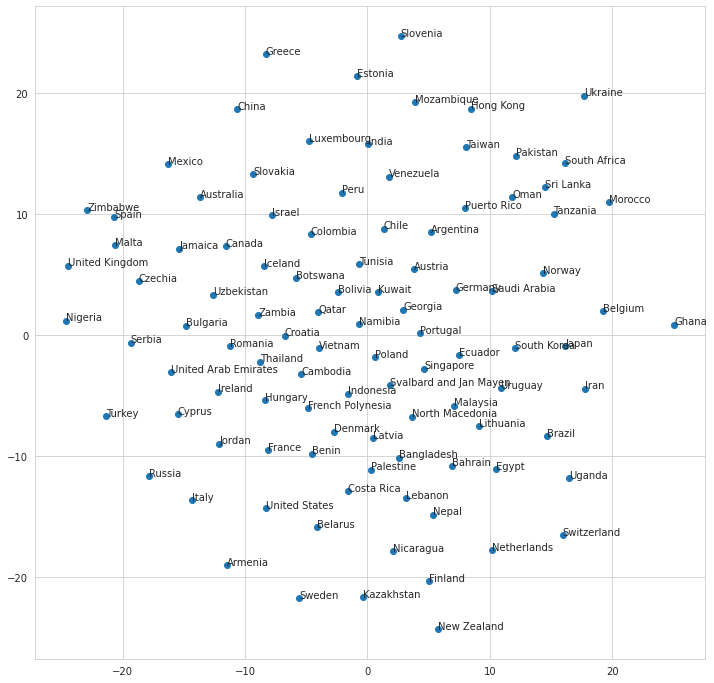

In [83]:
from sklearn.manifold import TSNE

vectors_list = []

for node in model.wv.index_to_key:
    vector = model.wv[node]
    vectors_list.append(vector)
    
vectors = np.array(vectors_list)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=7, n_iter=300)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the nodes
plt.figure(figsize=(12, 12))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, node in enumerate(model.wv.index_to_key):
    plt.annotate(node, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
plt.show()
